In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
dataset = pd.read_csv("diabetes.csv", header = 0)

In [198]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [199]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [200]:
dataset.shape

(768, 9)

In [201]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [202]:
dataset.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [203]:
dataset.isnull().sum()
dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012864BF5708>,
      dtype=object)

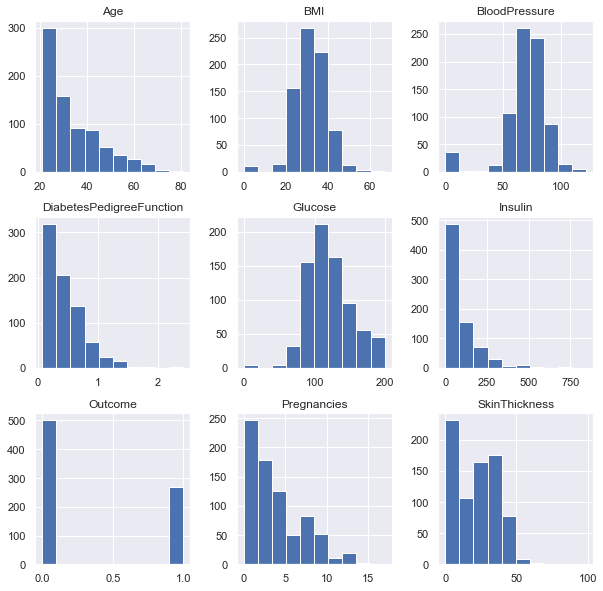

In [204]:
dataset.hist(figsize=(10, 10))

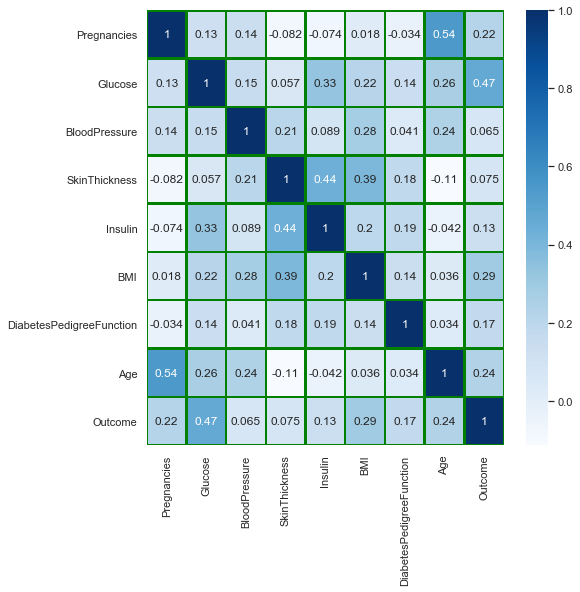

In [205]:
plt.figure(figsize=[8,8])
sns.heatmap(dataset.corr(),annot=True, cmap='Blues', linecolor='Green', linewidths=1.5)
plt.show()

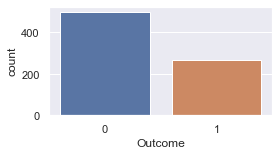

In [206]:
sns.countplot(dataset['Outcome'])
plt.show()

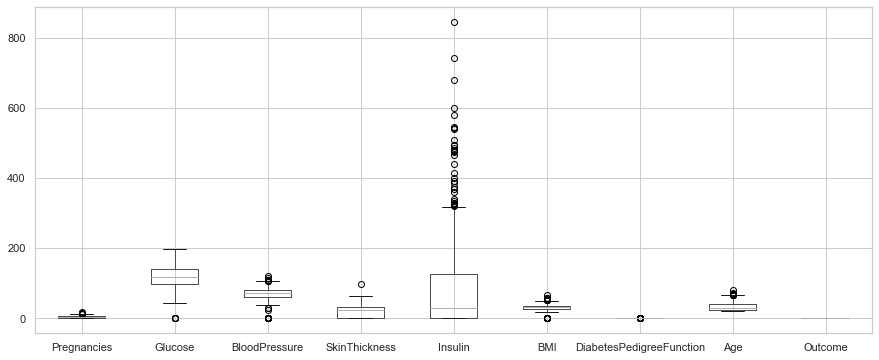

In [207]:
sns.set(style="whitegrid")
dataset.boxplot(figsize=(15,6))

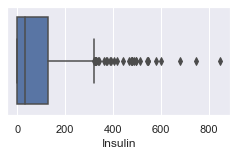

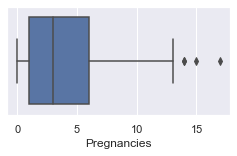

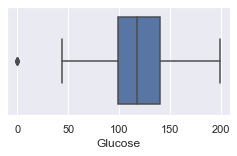

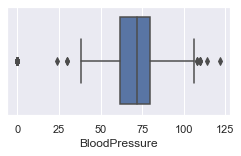

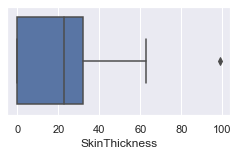

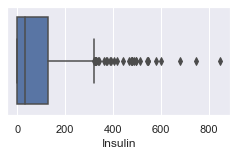

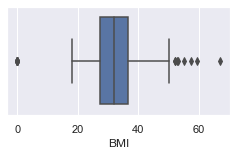

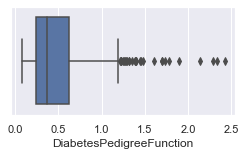

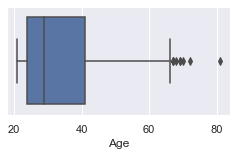

In [208]:
sns.set(style="whitegrid")

sns.set(rc={'figure.figsize':(4,2)})
sns.boxplot(x=dataset['Insulin'])
plt.show()
sns.boxplot(x=dataset['Pregnancies'])
plt.show()
sns.boxplot(x=dataset['Glucose'])
plt.show()
sns.boxplot(x=dataset['BloodPressure'])
plt.show()
sns.boxplot(x=dataset['SkinThickness'])
plt.show()
sns.boxplot(x=dataset['Insulin'])
plt.show()
sns.boxplot(x=dataset['BMI'])
plt.show()
sns.boxplot(x=dataset['DiabetesPedigreeFunction'])
plt.show()
sns.boxplot(x=dataset['Age'])
plt.show()

In [209]:
diabetes = dataset[(dataset.BloodPressure != 0) & (dataset.BMI != 0) & (dataset.Glucose != 0)]
print(diabetes.shape)

(724, 9)


In [210]:
features = diabetes.values[:, 0:8]
target = diabetes.values[:,8]

In [211]:
features

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [212]:
target

array([1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 1.

In [213]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [214]:
models = []
models.append(('SVC', SVC()))
models.append(('GNB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))

In [215]:
X_train, X_test, y_train, y_test = train_test_split(features, target, stratify = diabetes.Outcome, random_state=0)

In [216]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [217]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(543, 8)
(181, 8)
(543,)
(181,)


In [218]:
from sklearn.metrics import accuracy_score

names = []
accuracy = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    names.append(name)
score_accuracy = pd.DataFrame({'Name': names, 'Accuracy': accuracy})
print(score_accuracy)

  Name  Accuracy
0  SVC  0.773481
1  GNB  0.734807
2  KNN  0.784530
3   DT  0.762431


In [219]:
from sklearn.metrics import recall_score

names = []
recall = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    recall.append(recall_score(y_test, y_pred))
    names.append(name)
score_recall = pd.DataFrame({'Name': names, 'Recall': recall})
print(score_recall)

  Name    Recall
0  SVC  0.596774
1  GNB  0.612903
2  KNN  0.596774
3   DT  0.580645


In [220]:
from sklearn.metrics import precision_score

names = []
precision = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision.append(precision_score(y_test, y_pred))
    names.append(name)
score_precision = pd.DataFrame({'Name': names, 'Precision': precision})
print(score_precision)

  Name  Precision
0  SVC   0.698113
1  GNB   0.612903
2  KNN   0.725490
3   DT   0.639344


In [221]:
from sklearn.metrics import precision_score

names = []
f_measure = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f_measure.append(2*recall_score(y_test, y_pred)*precision_score(y_test, y_pred)/(recall_score(y_test, y_pred)+precision_score(y_test, y_pred)))
    names.append(name)
score_f_measure = pd.DataFrame({'Name': names, 'F-measure': f_measure})
print(score_f_measure)

  Name  F-measure
0  SVC   0.643478
1  GNB   0.612903
2  KNN   0.654867
3   DT   0.612903


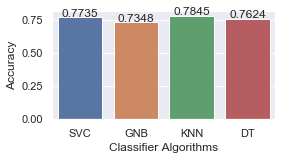

In [222]:
axis = sns.barplot(x = 'Name', y = 'Accuracy', data = score_accuracy)
axis.set(xlabel='Classifier Algorithms', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

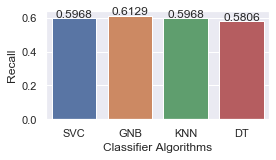

In [223]:
axis = sns.barplot(x = 'Name', y = 'Recall', data = score_recall)
axis.set(xlabel='Classifier Algorithms', ylabel='Recall')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

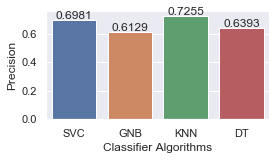

In [224]:
axis = sns.barplot(x = 'Name', y = 'Precision', data = score_precision)
axis.set(xlabel='Classifier Algorithms', ylabel='Precision')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

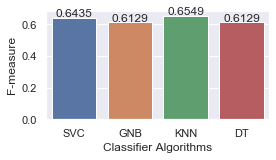

In [225]:
axis = sns.barplot(x = 'Name', y = 'F-measure', data = score_f_measure)
axis.set(xlabel='Classifier Algorithms', ylabel='F-measure')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

In [226]:
feature_importances = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Diabetics','Age' ]

# Support Vector Machines

In [227]:
from sklearn.svm import SVC

clf_SVC=SVC(kernel='linear',C=1,random_state=42)
clf_SVC.fit(X_train,y_train)

y_pred_SVC=clf_SVC.predict(X_test)

In [228]:
from sklearn.metrics import classification_report,roc_curve, roc_auc_score
print(classification_report(y_test,y_pred_SVC))

              precision    recall  f1-score   support

         0.0       0.79      0.88      0.83       119
         1.0       0.71      0.55      0.62        62

    accuracy                           0.77       181
   macro avg       0.75      0.72      0.73       181
weighted avg       0.76      0.77      0.76       181



In [229]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, y_pred_SVC)
TP = conf[0,0]
FP = conf[0,1]
TN = conf[1,0]
FN = conf[1,1]
print("TP=",TP)
print("FP=",FP)
print("TN=",TN)
print("FN=",FN)

TP= 105
FP= 14
TN= 28
FN= 34


In [230]:
#accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy_formula=(TP+TN)/(TP+TN+FP+FN)

#Recall = TP / (TP + FN)
recall_formula=TP / (TP + FN)

#Precision = TP / (TP + FP)
precision_formula=TP / (TP + FP)

#F-measure = 2*recall*precision/(recall+precision)
f_measure_formula=2*recall_formula*precision_formula/(recall_formula+precision_formula)

print("Accuracy of SVM by formula:",accuracy_formula)
print("Recall of SVM by formula:",recall_formula)
print("Precision of SVM by formula:",precision_formula)
print("F-measure of SVM by formula:",f_measure_formula)

Accuracy of SVM by formula: 0.7348066298342542
Recall of SVM by formula: 0.7553956834532374
Precision of SVM by formula: 0.8823529411764706
F-measure of SVM by formula: 0.813953488372093


Average precision-recall score: 0.54


Text(0.5, 1.0, 'Precision-Recall curve: AP=0.54')

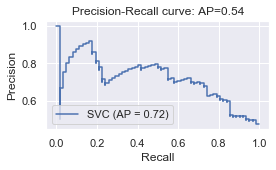

In [231]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred_SVC)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(clf_SVC, X_test, y_test)
disp.ax_.set_title('Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

# Naive Bayes

In [232]:
from sklearn.naive_bayes import GaussianNB

clf_NB=GaussianNB()
clf_NB.fit(X_train,y_train)

y_pred_NB=clf_NB.predict(X_test)

In [233]:
from sklearn.metrics import classification_report,roc_curve, roc_auc_score
print(classification_report(y_test,y_pred_NB))

              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80       119
         1.0       0.61      0.61      0.61        62

    accuracy                           0.73       181
   macro avg       0.71      0.71      0.71       181
weighted avg       0.73      0.73      0.73       181



In [234]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, y_pred_NB)
TP = conf[0,0]
FP = conf[0,1]
TN = conf[1,0]
FN = conf[1,1]
print("TP=",TP)
print("FP=",FP)
print("TN=",TN)
print("FN=",FN)

TP= 95
FP= 24
TN= 24
FN= 38


In [235]:
#accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy_formula=(TP+TN)/(TP+TN+FP+FN)

#Recall = TP / (TP + FN)
recall_formula=TP / (TP + FN)

#Precision = TP / (TP + FP)
precision_formula=TP / (TP + FP)

#F-measure = 2*recall*precision/(recall+precision)
f_measure_formula=2*recall_formula*precision_formula/(recall_formula+precision_formula)

print("Accuracy of NB by formula:",accuracy_formula)
print("Recall of NB formula:",recall_formula)
print("Precision of NB by formula:",precision_formula)
print("F-measure of NB by formula:",f_measure_formula)

Accuracy of NB by formula: 0.6574585635359116
Recall of NB formula: 0.7142857142857143
Precision of NB by formula: 0.7983193277310925
F-measure of NB by formula: 0.7539682539682541


Average precision-recall score: 0.51


Text(0.5, 1.0, 'Precision-Recall curve: AP=0.51')

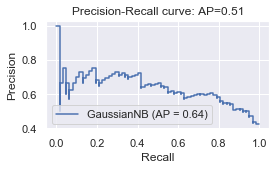

In [236]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred_NB)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(clf_NB, X_test, y_test)
disp.ax_.set_title('Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

# K-Nearest Neighbor Algorithm

In [237]:
from sklearn.neighbors import KNeighborsClassifier

clf_KNN= KNeighborsClassifier()
clf_KNN.fit(X_train,y_train)

y_pred_KNN=clf_KNN.predict(X_test)

In [238]:
from sklearn.metrics import classification_report,roc_curve, roc_auc_score
print(classification_report(y_test,y_pred_KNN))

              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84       119
         1.0       0.73      0.60      0.65        62

    accuracy                           0.78       181
   macro avg       0.77      0.74      0.75       181
weighted avg       0.78      0.78      0.78       181



In [239]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, y_pred_KNN)
TP = conf[0,0]
FP = conf[0,1]
TN = conf[1,0]
FN = conf[1,1]
print("TP=",TP)
print("FP=",FP)
print("TN=",TN)
print("FN=",FN)

TP= 105
FP= 14
TN= 25
FN= 37


In [240]:
#accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy_formula=(TP+TN)/(TP+TN+FP+FN)

#Recall = TP / (TP + FN)
recall_formula=TP / (TP + FN)

#Precision = TP / (TP + FP)
precision_formula=TP / (TP + FP)

#F-measure = 2*recall*precision/(recall+precision)
f_measure_formula=2*recall_formula*precision_formula/(recall_formula+precision_formula)

print("Accuracy of KNN by formula:",accuracy_formula)
print("Recall of KNN formula:",recall_formula)
print("Precision of KNN by formula:",precision_formula)
print("F-measure of KNN by formula:",f_measure_formula)

Accuracy of KNN by formula: 0.7182320441988951
Recall of KNN formula: 0.7394366197183099
Precision of KNN by formula: 0.8823529411764706
F-measure of KNN by formula: 0.8045977011494253


Average precision-recall score: 0.57


Text(0.5, 1.0, 'Precision-Recall curve: AP=0.57')

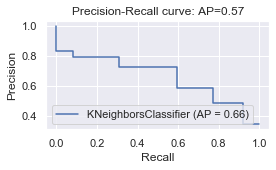

In [241]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred_KNN)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(clf_KNN, X_test, y_test)
disp.ax_.set_title('Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

# Decision Tree

In [242]:
from sklearn.tree import DecisionTreeClassifier

clf_DT = DecisionTreeClassifier()
clf_DT.fit(X_train,y_train)

y_pred_DT=clf_DT.predict(X_test)

In [243]:
from sklearn.metrics import classification_report,roc_curve, roc_auc_score
print(classification_report(y_test,y_pred_DT))

              precision    recall  f1-score   support

         0.0       0.77      0.80      0.79       119
         1.0       0.59      0.55      0.57        62

    accuracy                           0.71       181
   macro avg       0.68      0.67      0.68       181
weighted avg       0.71      0.71      0.71       181



In [244]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, y_pred_DT)
TP = conf[0,0]
FP = conf[0,1]
TN = conf[1,0]
FN = conf[1,1]
print("TP=",TP)
print("FP=",FP)
print("TN=",TN)
print("FN=",FN)

TP= 95
FP= 24
TN= 28
FN= 34


In [245]:
#accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy_formula=(TP+TN)/(TP+TN+FP+FN)

#Recall = TP / (TP + FN)
recall_formula=TP / (TP + FN)

#Precision = TP / (TP + FP)
precision_formula=TP / (TP + FP)

#F-measure = 2*recall*precision/(recall+precision)
f_measure_formula=2*recall_formula*precision_formula/(recall_formula+precision_formula)

print("Accuracy of DT by formula:",accuracy_formula)
print("Recall of DT formula:",recall_formula)
print("Precision of DT by formula:",precision_formula)
print("F-measure of DT by formula:",f_measure_formula)

Accuracy of DT by formula: 0.6795580110497238
Recall of DT formula: 0.7364341085271318
Precision of DT by formula: 0.7983193277310925
F-measure of DT by formula: 0.7661290322580645


Average precision-recall score: 0.48


Text(0.5, 1.0, 'Precision-Recall curve: AP=0.48')

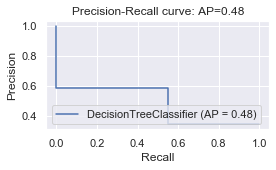

In [246]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred_DT)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(clf_DT, X_test, y_test)
disp.ax_.set_title('Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [247]:
feature_importances = clf_DT.feature_importances_
feature_importances

array([0.08411399, 0.33233789, 0.11052452, 0.01801245, 0.04271437,
       0.13713445, 0.15089536, 0.12426696])

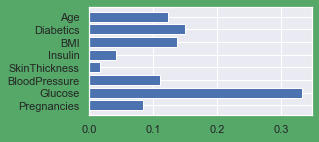

In [248]:
plt.figure(facecolor='g')
plt.barh(feature_names,feature_importances)
plt.show()